
# 🍄 Proporciones de los hongos
En esta lección, utilizarás un conjunto de datos diferente centrado en la naturaleza para visualizar proporciones, como por ejemplo cuántos tipos diferentes de hongos pueblan un determinado conjunto de datos sobre setas. Vamos a explorar estos fascinantes hongos utilizando un conjunto de datos procedente de Audubon que enumera detalles sobre 23 especies de hongos con branquias de las familias Agaricus y Lepiota. Experimentarás con sabrosas visualizaciones como:

* Gráficos de tarta 🥧
* Gráficos de donuts 🍩
* Gráficos de waffles 🧇

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
mushrooms = pd.read_csv('../../data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,NaN,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


Enseguida se nota que todos los datos son textuales. Tendrás que convertir estos datos para poder utilizarlos en un gráfico. La mayoría de los datos, de hecho, se representan como un objeto:

In [2]:
print(mushrooms.select_dtypes(["object"]).columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


Toma estos datos y convierte la columna "class" en una categoría:

In [3]:
cols = mushrooms.select_dtypes(["object"]).columns
mushrooms[cols] = mushrooms[cols].astype('category')

Ahora, si imprimes los datos de las setas, puedes ver que se han agrupado en categorías según la clase venenosa/comestible (venenosa/comestible):

In [9]:
edibleclass=mushrooms.groupby(['class']).count()
edibleclass

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
Edible,4208,4208,4208,4208,800,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
Poisonous,3916,3916,3916,3916,3796,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3880,3880,3916,3916,3916


## ¡Pastel!

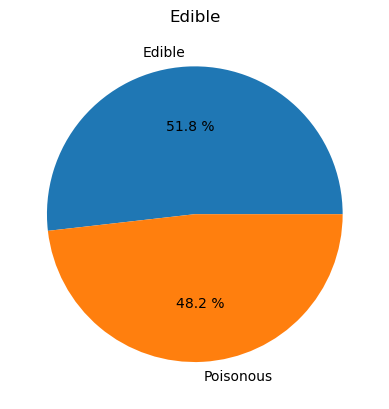

In [10]:
labels=['Edible','Poisonous']
plt.pie(edibleclass['population'],labels=labels,autopct='%.1f %%')
plt.title('Edible')
plt.show()

## ¡Donas!
Algo más interesante desde el punto de vista visual que el gráfico de pastel es el gráfico de donas, que es un gráfico circular con un agujero en el centro. Veamos nuestros datos con este método.

Observa los distintos hábitats donde crecen las setas:

In [11]:
habitat=mushrooms.groupby(['habitat']).count()
habitat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
habitat,,,,,,,,,,,,,,,,,,,,,
Grasses,2148,2148,2148,2148,2148,1056,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Leaves,832,832,832,832,832,576,832,832,832,832,...,832,832,832,832,832,832,832,832,832,832
Meadows,292,292,292,292,292,256,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Paths,1144,1144,1144,1144,1144,1104,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
Urban,368,368,368,368,368,272,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
Waste,192,192,192,192,192,0,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
Wood,3148,3148,3148,3148,3148,1332,3148,3148,3148,3148,...,3148,3148,3148,3148,3148,3148,3112,3112,3148,3148


Aquí, estás agrupando tus datos por hábitat. Hay 7 listados, así que úsalos como etiquetas para tu gráfico de donas:

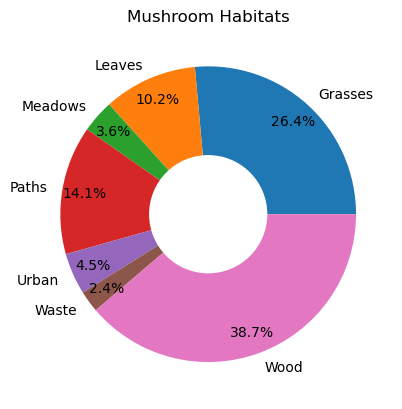

In [12]:
labels=['Grasses','Leaves','Meadows','Paths','Urban','Waste','Wood']

plt.pie(habitat['class'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Mushroom Habitats')
  
plt.show()

Este código dibuja un gráfico y un círculo central, luego añade ese círculo central en el gráfico. Edite el ancho del círculo central cambiando `0.40` por otro valor.

Los gráficos de donas pueden ser modificados de varias maneras para cambiar las etiquetas. Las etiquetas, en particular, pueden ser resaltadas para facilitar su lectura. Obtenga más información en los documentos .

Ahora que sabes cómo agrupar tus datos y mostrarlos como un pastel o una dona, puedes explorar otros tipos de gráficos. Prueba con un gofre gráfico, que es una forma diferente de explorar la cantidad.

## ¡Waffle!
Un gráfico de tipo "waffle" es una forma diferente de visualizar las cantidades como una matriz 2D de cuadrados. Intenta visualizar las diferentes cantidades de colores de los sombreros de los champiñones en este conjunto de datos. Para hacer esto, necesitas instalar una biblioteca de ayuda llamada PyWaffle y usar Matplotlib:

In [13]:
pip install pywaffle

  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/8f/fc/295f4f71fc157de68dcf25a4850953e61f6eca644e7416f10a281ed42441/fontawesomefree-6.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/25.6 MB 812.7 kB/s eta 0:00:32
   ---------------------------------------- 0.2/25.6 MB 2.1 MB/s eta 0:00:12
    --------------------------------------- 0.4/25.6 MB 2.6 MB/s eta 0:00:10
   - -------------------------------------- 0.9/25.6 MB 4.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.6/25.6 MB 6.3 MB/s eta 0:00:04
   --- ------------------------------------ 2.5/25.6 MB 7.5 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/25.6 MB 8.0 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/25.6 MB 8.4 MB/s eta 0:00:03
   ------ -----------------

Seleccione un segmento de sus datos para agrupar:

In [14]:
capcolor=mushrooms.groupby(['cap-color']).count()
capcolor

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-color,,,,,,,,,,,,,,,,,,,,,
Brown,2284,2284,2284,2284,1100,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2272,2272,2284,2284,2284
Buff,168,168,168,168,96,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
Cinnamon,44,44,44,44,12,44,44,44,44,44,...,44,44,44,44,44,32,32,44,44,44
Green,1856,1856,1856,1856,808,1856,1856,1856,1856,1856,...,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
Pink,144,144,144,144,64,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Purple,16,16,16,16,0,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Red,1500,1500,1500,1500,876,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1488,1488,1500,1500,1500
White,1040,1040,1040,1040,592,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
Yellow,1072,1072,1072,1072,1048,1072,1072,1072,1072,1072,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


Crea un gráfico de waffles creando etiquetas y luego agrupando los datos:

c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


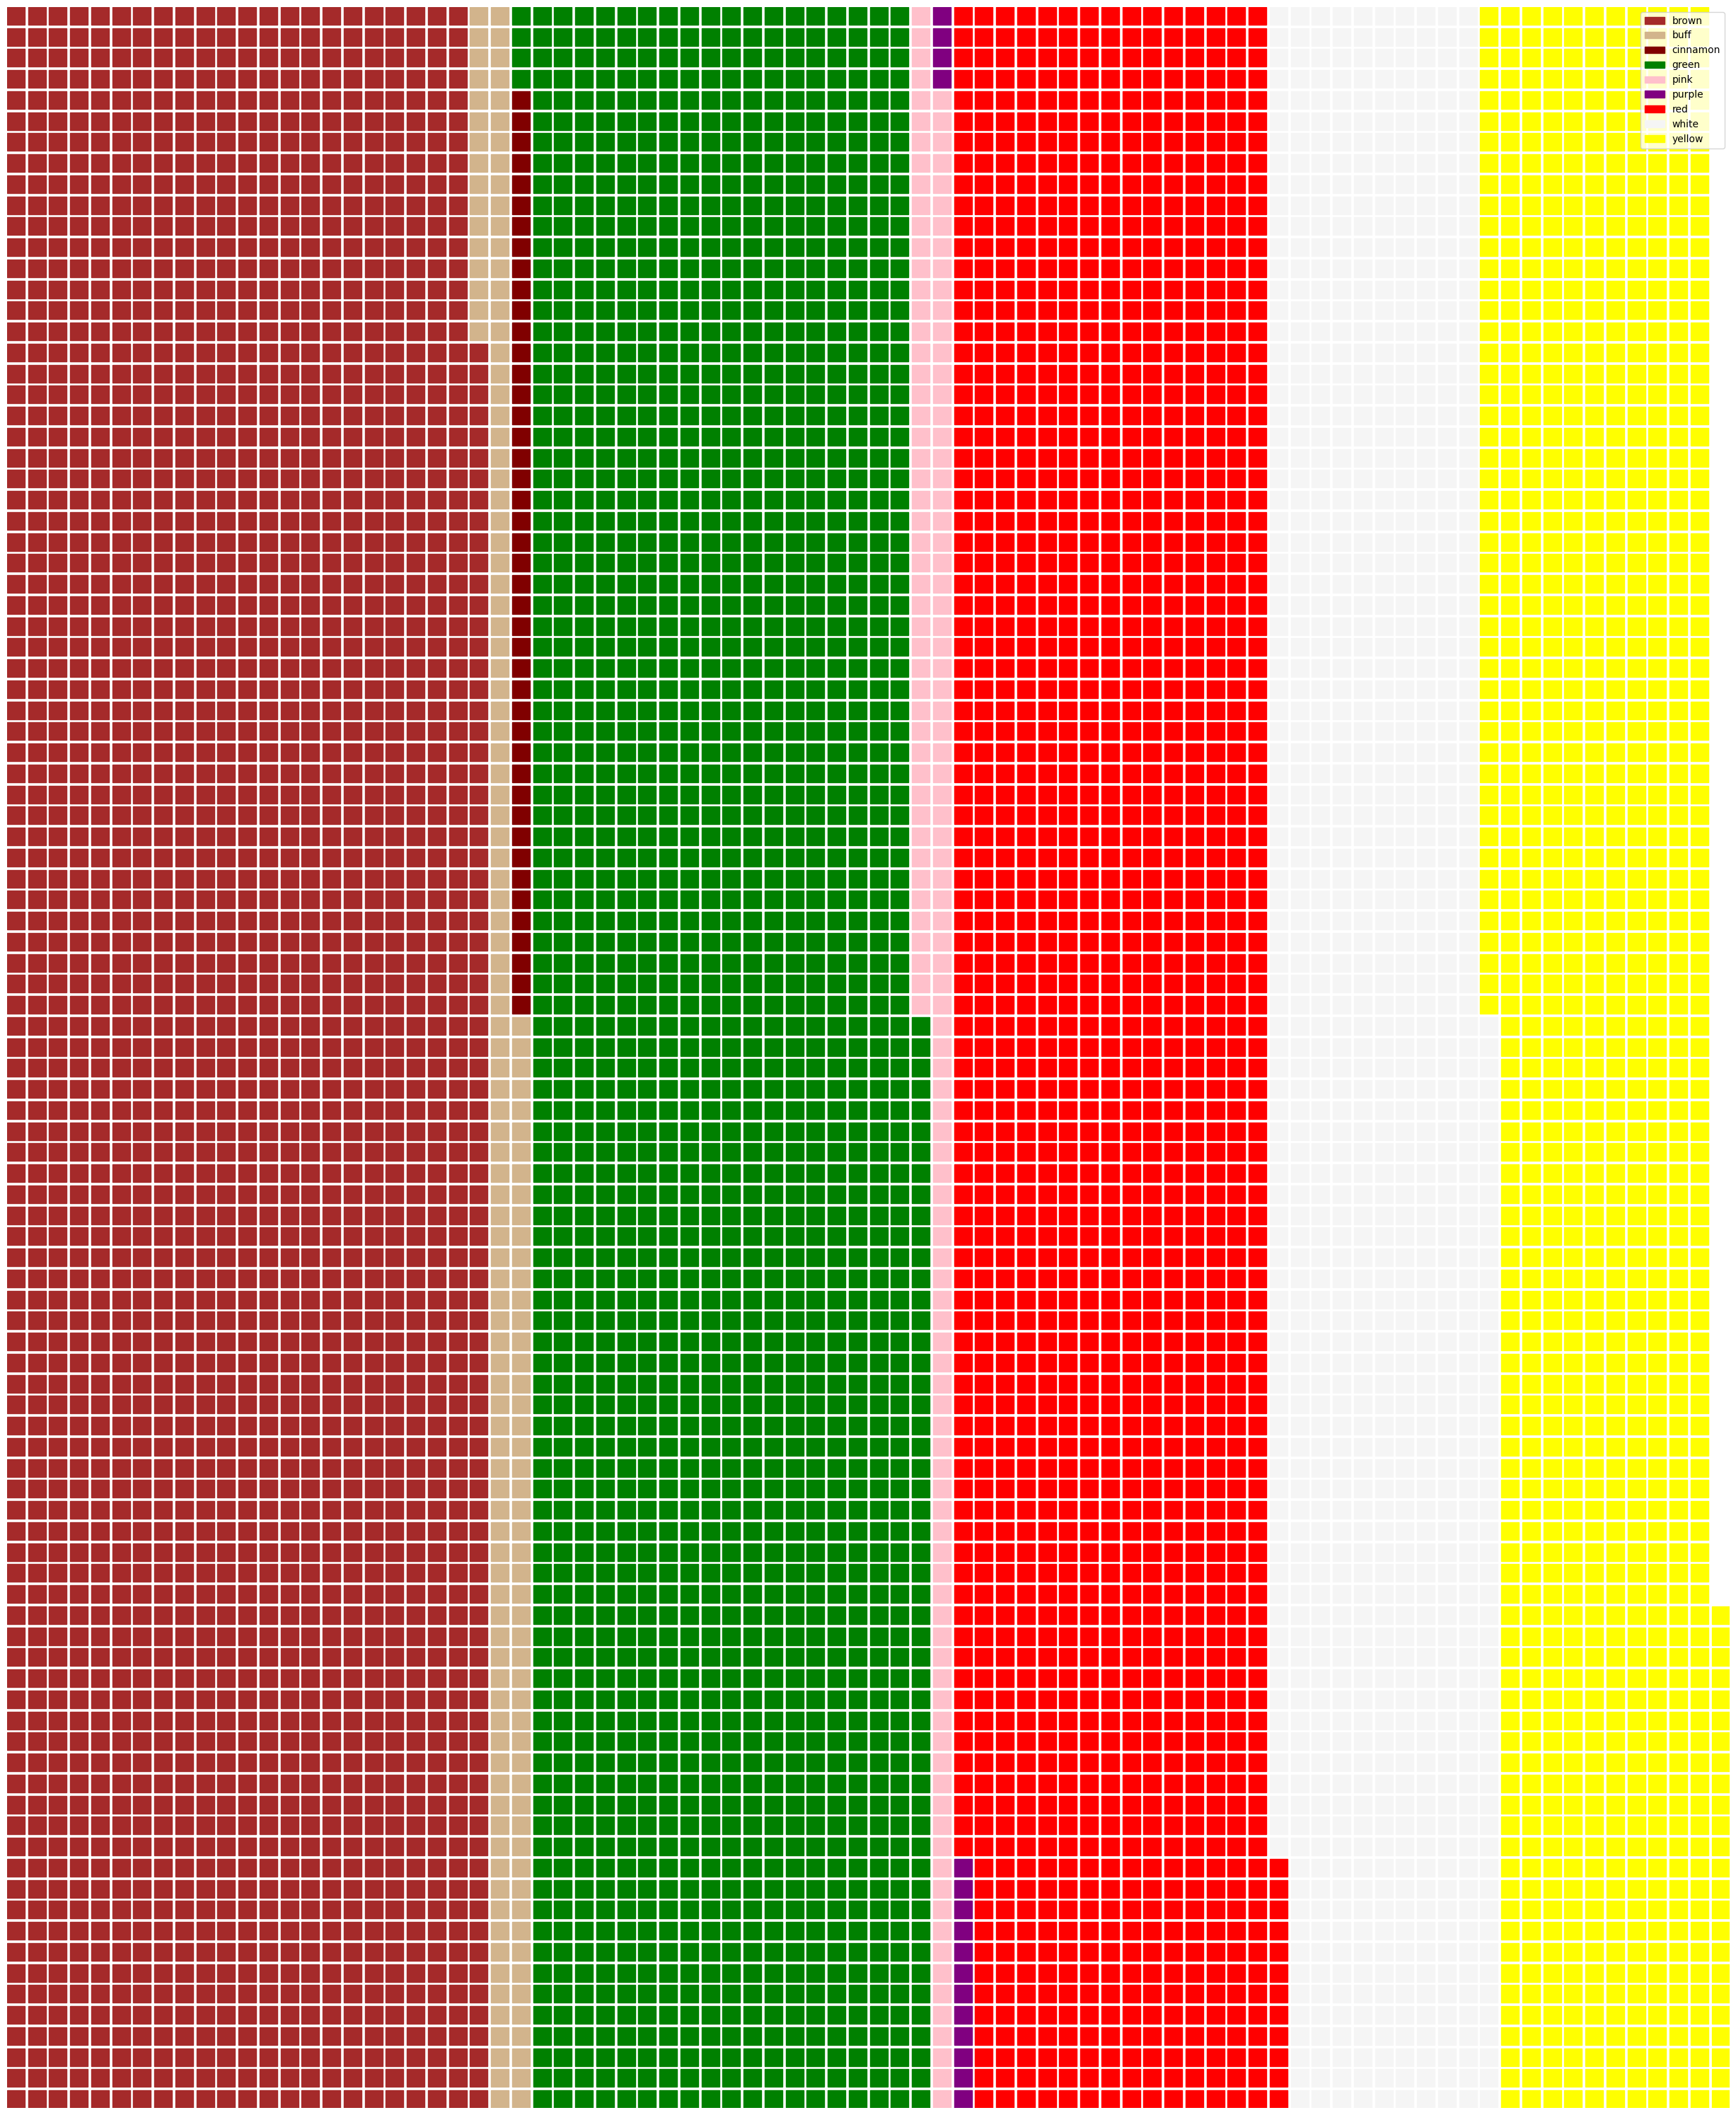

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
  
data ={'color': ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
    'amount': capcolor['class']
     }
  
df = pd.DataFrame(data)
  
fig = plt.figure(
    FigureClass = Waffle,
    rows = 100,
    values = df.amount,
    labels = list(df.color),
    figsize = (30,30),
    colors=["brown", "tan", "maroon", "green", "pink", "purple", "red", "whitesmoke", "yellow"],
)

✅ Pywaffle soporta iconos dentro de los gráficos que utilizan cualquier icono disponible en Font Awesome . Haz algunos experimentos para crear un gofre gráfico aún más interesante usando iconos en lugar de cuadrados.

En esta lección, aprendiste tres maneras de visualizar proporciones. En primer lugar, debes agrupar tus datos en categorías y luego decidir cuál es la mejor manera de mostrar los datos: pastel, dona o waffle. Todas son deliciosas y gratifican al usuario con una instantánea de un conjunto de datos.